# Classification Challenge

The purpose of this challenge is to build a predictive model for the school dataset and use it to predict the gender of twenty students (contained in test set).

## Import the packages

First of all I import the packages i will be using for the first part the challenge

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


I import also the datasets I was provided with

In [2]:
train = pd.read_csv('school_data_train.csv')

In [3]:
test = pd.read_csv('school_data_test.csv')

Let's have a glance at the datasets

In [4]:
train.head()

,UserID,Gender,Ageyears,Handed,Height,Foot_Length,Arm_Span,Languages_spoken,Travel_to_School,Travel_time_to_School,Reaction_time,Score_in_memory_game
0,1,F,13,R,174,26,173,2,Car,15,0.350,27
1,2,F,9,R,139,21,139,6,Walk,5,0.549,0
2,3,M,12,R,164,30,157,2,Car,10,0.400,33
3,4,M,11,R,146,26,145,3,Car,1,0.370,28
4,5,F,10,R,159,22,150,1,Bus,6,0.296,33


In [5]:
test.head()

,UserID,Ageyears,Handed,Height,Foot_Length,Arm_Span,Languages_spoken,Travel_to_School,Travel_time_to_School,Reaction_time,Score_in_memory_game
0,1,11,L,154,20,145,1,Walk,5,0.800,45
1,2,10,R,161,21,155,1,Car,5,0.406,0
2,3,6,R,115,18,117,4,Walk,10,0.690,77
3,4,8,R,138,20,137,1,Car,5,0.312,0
4,5,17,R,160,21,160,1,Car,7,0.774,35


We can notice how the test dataset hasn't gender column. I have to predict those values.

Let's see some summary stats and the columns characteristics of both datasets

In [6]:
train.describe()

,UserID,Ageyears,Height,Foot_Length,Arm_Span,Languages_spoken,Travel_time_to_School,Reaction_time,Score_in_memory_game
count,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000
mean,490.500000,13.259184,159.716327,24.004082,157.143878,1.582653,16.321429,0.423927,38.895918
std,283.045933,2.392568,14.529219,3.500180,17.733434,0.928663,13.917448,0.232761,21.533009
min,1.000000,5.000000,90.000000,9.000000,88.000000,1.000000,0.000000,0.000000,0.000000
25%,245.750000,12.000000,151.000000,22.000000,148.000000,1.000000,5.000000,0.320000,31.000000
50%,490.500000,13.000000,160.000000,24.000000,158.000000,1.000000,13.000000,0.390000,40.000000
75%,735.250000,15.000000,169.000000,26.000000,169.000000,2.000000,20.000000,0.490000,49.000000
max,980.000000,20.000000,226.000000,45.000000,218.000000,9.000000,127.000000,1.920000,213.000000


In [7]:
test.describe()

,UserID,Ageyears,Height,Foot_Length,Arm_Span,Languages_spoken,Travel_time_to_School,Reaction_time,Score_in_memory_game
count,20.00000,20.000000,20.000000,20.00000,20.000000,20.000000,20.00000,20.000000,20.000000
mean,10.50000,11.850000,155.500000,23.95000,151.100000,1.500000,14.65000,0.434600,39.500000
std,5.91608,2.870448,14.158873,3.54631,15.616793,0.945905,14.00855,0.166552,16.388378
min,1.00000,6.000000,115.000000,18.00000,117.000000,1.000000,2.00000,0.248000,0.000000
25%,5.75000,11.000000,148.750000,21.00000,143.750000,1.000000,5.00000,0.318000,38.750000
50%,10.50000,11.000000,155.500000,23.00000,152.500000,1.000000,10.00000,0.393500,41.000000
75%,15.25000,14.000000,162.750000,27.25000,158.500000,2.000000,12.75000,0.452500,44.250000
max,20.00000,17.000000,179.000000,30.00000,181.000000,4.000000,50.00000,0.800000,77.000000


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 12 columns):
UserID                   980 non-null int64
Gender                   980 non-null object
Ageyears                 980 non-null int64
Handed                   980 non-null object
Height                   980 non-null int64
Foot_Length              980 non-null int64
Arm_Span                 980 non-null int64
Languages_spoken         980 non-null int64
Travel_to_School         980 non-null object
Travel_time_to_School    980 non-null int64
Reaction_time            980 non-null float64
Score_in_memory_game     980 non-null int64
dtypes: float64(1), int64(8), object(3)
memory usage: 92.0+ KB


## Some exploratory analysis

Let's see some visualization

We can notice how the distribution of the numeric columns looks something similar to a normal just for the arm span variable

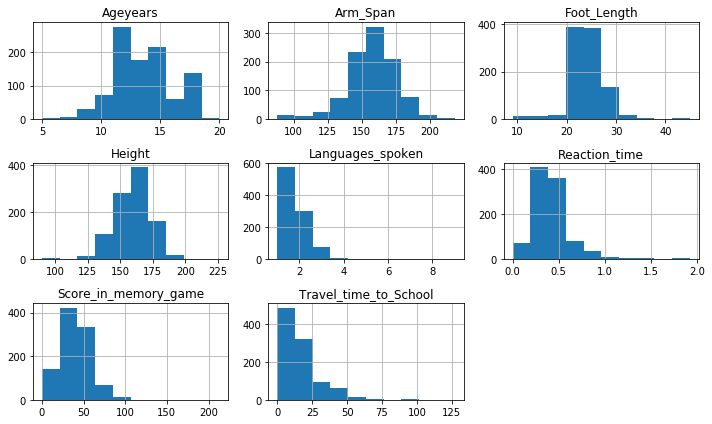

In [9]:
train.drop('UserID', axis = 1).hist(figsize = (10,6))
plt.style.use('ggplot')
plt.tight_layout()

Let's see the zero values, which can be seen in this case as missing values. In the real world it doesn't make a lot of sense a student who scores zero in memory game, has no reaction time and has a zero minute long trip to get to school (the latter can be possible though)

In [10]:
print(len(train[train.Travel_time_to_School == 0]))
print(len(train[train.Reaction_time == 0]))
print(len(train[train.Score_in_memory_game == 0]))

1
65
138


I define a function that will be replacing 0 values with the average

In [11]:
def repmv(x):
    train[x][train[x] == 0] = np.mean(train[x])
    return train[x]

In [12]:
repmv('Reaction_time')
repmv('Travel_time_to_School')
repmv('Score_in_memory_game')

C:\Users\lucar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\lucar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0      27.000000
1      38.895918
2      33.000000
3      28.000000
4      33.000000
5      34.000000
6      41.000000
7      44.000000
8      39.000000
9      82.000000
10     38.895918
11     61.000000
12     25.000000
13     42.000000
14     32.000000
15     32.000000
16     30.000000
17     38.895918
18     31.000000
19     73.000000
20     62.000000
21     52.000000
22     46.000000
23     42.000000
24     67.000000
25     38.895918
26     40.000000
27     57.000000
28     43.000000
29     34.000000
         ...    
950    38.895918
951    55.000000
952    28.000000
953    45.000000
954    32.000000
955    30.000000
956    57.000000
957    58.000000
958    47.000000
959    37.000000
960    40.000000
961    38.000000
962    40.000000
963    38.895918
964    36.000000
965    46.000000
966    39.000000
967    46.000000
968    38.895918
969    56.000000
970    29.000000
971    35.000000
972    35.000000
973    53.000000
974    41.000000
975    41.000000
976    45.000000
977    70.0000

Let's double check if we have no longer 0 values

In [13]:
print(len(train[train.Travel_time_to_School == 0]))
print(len(train[train.Reaction_time == 0]))
print(len(train[train.Score_in_memory_game == 0]))

0
0
0


Here we are

I create the following dataframe for plotting some boxplots

In [14]:
h = train.loc[:,['Height', 'Arm_Span', 'Foot_Length', 'Score_in_memory_game', 'Travel_time_to_School','Gender']]

#### Using both matplotlib (for creating the canvas and the axes) and pandas built-in visualization I can plot in the same cell all the boxplots I'm interested in.
#### We can see that, apart from foot length, the averages are approximately the same, also for height, surprisingly. This can be due to the fact that the students are very young, so the difference in height averages is not so big.

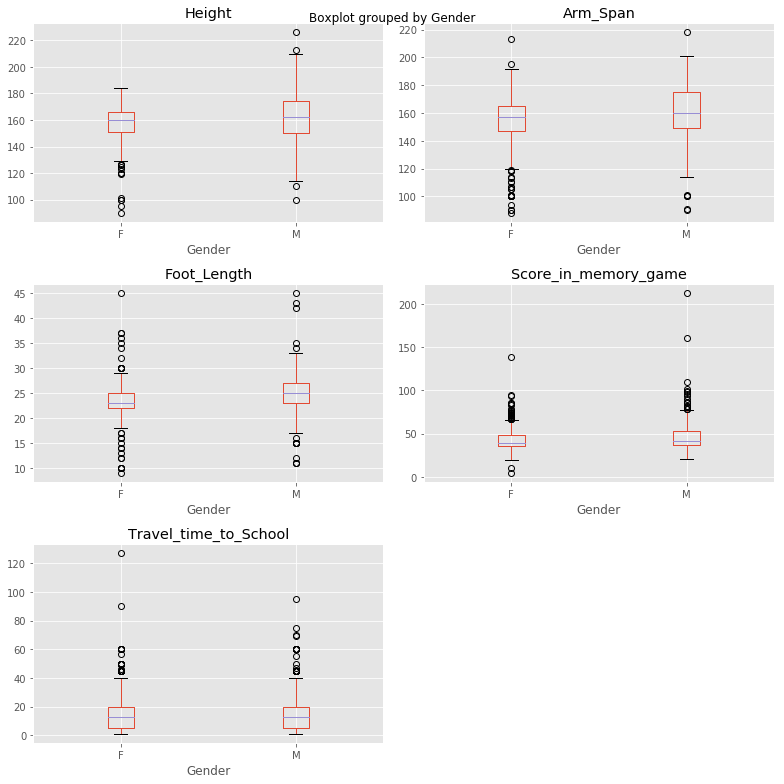

In [15]:
fig, ax = plt.subplots(3,2, figsize = (11,11))
for i, el in enumerate(list(h.columns.values)[:-1]):
                       h.boxplot(el, by = 'Gender', ax = ax.flatten()[i])
fig.delaxes(ax[2,1]) # remove the empty canvas
plt.tight_layout() 

I remove UserID column

In [16]:
train.drop('UserID', inplace=True, axis = 1)

## Preprocessing

### The preprocessing is a very important phase. I'm going to create two functions. The first will be applied to some columns, whereas the second to both test and train set.

First I import the StandardScaler package for performing some scaling. This is required in KNN algorithm as it relies on euclidean distance for classifying the data. We need the values to be in a range that is comparable.

In [17]:
from sklearn.preprocessing import StandardScaler

I'll be using the first function for turning the categorical variables into dummy variables.

In [18]:
def preprocess(d,c):
    d[c] = d[c].astype('category').cat.codes
    return d[c]

This second function will perform the scaling on the predictive variables. 

In [19]:
def scale(x, i):
    scaler = StandardScaler()
    scaler.fit(x.drop([i],axis=1))
    scaled_features = scaler.transform((x.drop([i],axis=1)))
    scaledfeat = pd.DataFrame(scaled_features)
    scaledfeat.rename(columns ={0: 'Ageyears', 1: 'Handed',2: 'Height', 3: 'Foot_Length', 4: 'Arm_Span', 5: 'Languages_spoken', 6: 'Travel_to_School', 7: 'Travel_time_to_School', 8: 'Reaction_time', 9:'Score_in_memory_game'}, inplace = True)
    return scaledfeat

Now I apply the preprocess function to the columns I'm interested in

In [20]:
preprocess(train,'Handed')
preprocess(train, 'Travel_to_School')
preprocess(train, 'Gender')
preprocess(test,'Handed')
preprocess(test, 'Travel_to_School')

0     4
1     1
2     4
3     1
4     1
5     1
6     3
7     1
8     0
9     1
10    1
11    4
12    1
13    1
14    4
15    1
16    1
17    2
18    0
19    1
Name: Travel_to_School, dtype: int8

Then, I apply the scale function to both datasets

In [22]:
scale(train, 'Gender')
scale(test, 'UserID')

,Ageyears,Handed,Height,Foot_Length,Arm_Span,Languages_spoken,Travel_to_School,Travel_time_to_School,Reaction_time,Score_in_memory_game
0,-0.303814,-1.257237,-0.108693,-1.142769,-0.400752,-0.542326,1.787964,-0.706761,2.250897,0.344322
1,-0.661242,0.538816,0.398540,-0.853461,0.256219,-0.542326,-0.494543,-0.706761,-0.176179,-2.472859
2,-2.090953,0.538816,-2.934706,-1.721387,-2.240272,2.711631,1.787964,-0.340563,1.573287,2.347651
3,-1.376097,0.538816,-1.268083,-1.142769,-0.926329,-0.542326,-0.494543,-0.706761,-0.755227,-2.472859
4,1.840754,0.538816,0.326078,-0.853461,0.584704,-0.542326,-0.494543,-0.560282,2.090735,-0.281718
5,-0.303814,-1.257237,-0.108693,-0.274843,0.190522,-0.542326,-0.494543,-0.340563,1.573287,0.031302
6,-0.303814,0.538816,0.108693,0.882392,0.453310,0.542326,1.027128,2.589014,-0.644345,-0.344322
7,1.125898,0.538816,1.268083,1.171700,1.767253,0.542326,-0.494543,-0.706761,-0.268580,0.093906
8,0.411042,0.538816,0.471002,-0.274843,0.453310,0.542326,-1.255379,1.270704,-0.890749,0.093906
9,1.483326,0.538816,0.688388,-0.274843,-0.006570,-0.542326,-0.494543,-0.340563,-0.188499,-0.031302


Let's have a look at the new df_train dataframe

In [23]:
df_train.head()

,Ageyears,Handed,Height,Foot_Length,Arm_Span,Languages_spoken,Travel_to_School,Travel_time_to_School,Reaction_time,Score_in_memory_game
0,-0.108384,0.369026,0.983602,0.570524,0.894594,0.449635,-0.414478,-0.096261,-0.501449,-1.170874
1,-1.781082,0.369026,-1.426567,-0.858703,-1.023668,4.759100,1.815284,-0.815657,0.476441,-0.369139
2,-0.526558,0.369026,0.294982,1.713906,-0.008117,0.449635,-0.414478,-0.455959,-0.255748,-0.766499
3,-0.944733,0.369026,-0.944533,0.570524,-0.685151,1.527002,-0.414478,-1.103415,-0.403169,-1.103478
4,-1.362907,0.369026,-0.049328,-0.572858,-0.403054,-0.627731,-0.786105,-0.743717,-0.766807,-0.766499


## Modelling 

After the preprocessing phase, now it's time to build some models

I start from importing the train_test_split package, which split arrays into random train and test subsets

In [24]:
from sklearn.model_selection import train_test_split

Then, I define my X matrix (the predictive variables) and my y array (the response variable)

In [25]:
X = df_train.loc[:,'Ageyears': 'Score_in_memory_game']
y = df_train['Gender'] = train['Gender']

I use the tuple unpacking for creating 4 subsets I'll be using for create my KNN model

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .25,random_state=100)

I import KNN classifier

In [27]:
from sklearn.neighbors import KNeighborsClassifier

I start by using the simplest knn model with just 1 neighbor

In [28]:
knn = KNeighborsClassifier(n_neighbors = 1) #simplest model

Then I fit the model on train dataset and after that I predict on test set

In [29]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [30]:
pred = knn.predict(X_test)

In [31]:
knn.score(X_test, y_test) 

0.6244897959183674

As we can see we don't have a very accurate prediction

#### Metrics

Let's use some metrics in order to get some details about model performance

In [32]:
from sklearn.metrics import classification_report,confusion_matrix

In [33]:
print(confusion_matrix(y_test,pred))

[[95 39]
 [53 58]]


In [34]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.64      0.71      0.67       134
          1       0.60      0.52      0.56       111

avg / total       0.62      0.62      0.62       245



We can see that the model is not very efficient in both precision and recall terms. 

### Model enhancement

I iterate over the number of neighbors from 1 to 30. What we want to get is a list which contains the error rates for each number of K picked.


In [35]:
error_rate = [] # this is the list that will be filled with the numpy object

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

It is common use to do some vizualization in order to pick up the right number ok K

Text(0,0.5,'Error Rate')

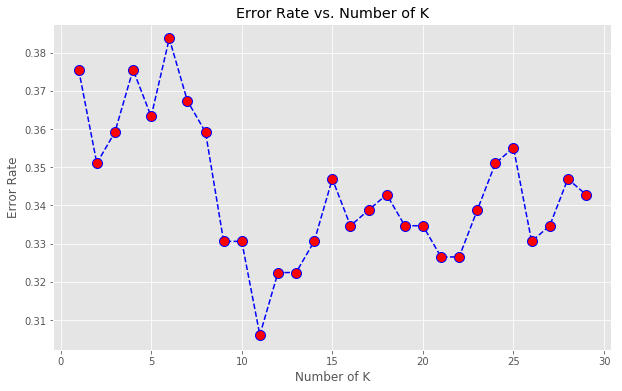

In [36]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. Number of K')
plt.xlabel('Number of K')
plt.ylabel('Error Rate')

### K = 11 is the best choice according to this plot

I'm going to do the same thing I did for the previous model

In [37]:
knn2 = KNeighborsClassifier(n_neighbors = 11)

In [38]:
knn2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='uniform')

In [39]:
pred2 = knn2.predict(X_test)

In [40]:
print(confusion_matrix(y_test, pred2))

[[110  24]
 [ 51  60]]


In [41]:
print(classification_report(y_test, pred2))

             precision    recall  f1-score   support

          0       0.68      0.82      0.75       134
          1       0.71      0.54      0.62       111

avg / total       0.70      0.69      0.69       245



In [42]:
knn2.score(X_test, y_test)

0.6938775510204082

#### We got a better result overall

Now that I've picked the best K value, I can make the prediction on the 20 students of the test dataframe

In [43]:
gender_prediction = knn2.predict(df_test)

In [44]:
gender_prediction

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0],
      dtype=int8)

I create the output dataframe in the format requested

In [45]:
output = pd.DataFrame({'UserID' : range(1,21), 'Gender': gender_prediction})

In [46]:
output.loc[output['Gender'] == 0, 'Gender'] = 'F'
output.loc[output['Gender'] == 1, 'Gender'] = 'M'

In [47]:
output

,UserID,Gender
0,1,F
1,2,F
2,3,F
3,4,F
4,5,F
5,6,F
6,7,M
7,8,M
8,9,F
9,10,F


I set UserID column as index, as it is what I need for the output format

In [48]:
output.set_index('UserID', inplace = True)

Finally, I use to_csv function of pandas in order to convert the dataframe into a csv file

In [49]:
output.to_csv('output.csv')

### Cross-validation

Let's try if with cross-validation we have a better accuracy

In [50]:
#I import the package I need
from sklearn.model_selection import cross_val_score

In [51]:
# creating a list of K for KNN
neighbors = list(range(1,50))

# empty list that will contain cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn3 = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn3, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

This represents the Mean Squared Error for each of the K 

In [52]:
MSE = [1 - x for x in cv_scores]

Let's plot to see which is the best value of K while performing cross validation

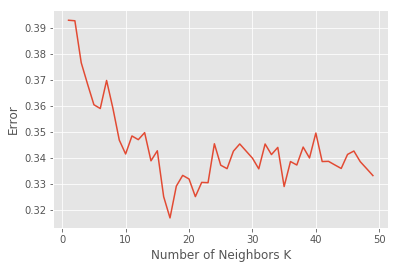

In [53]:
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Error')
plt.show()

Actually from the plot it is not easy to spot the k for which we get the lower MSE.


Let's use the index method along with min function to get the number of K which minimizes the error

In [54]:
MSE.index(min(MSE))

16

16 is the best value for K in the case of cross validation

In [55]:
cv_scores_max = pd.DataFrame(cv_scores).max()
cv_scores_max

0    0.683115
dtype: float64

#### We get approximately the same accuracy (a bit less) as with K = 11 without using cross validation

## Other Models

We've seen that KNN is not a very good model in terms of accuracy. Let's try with another ones. I will still be using the scaled features as input variables, even if it is not strictly required, as it was for KNN algorithm.

I try first the decision tree algorithm

### Decision tree

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
dtree = DecisionTreeClassifier()

In [58]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [59]:
predictions = dtree.predict(X_test)

In [60]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.62      0.63      0.62       134
          1       0.54      0.53      0.54       111

avg / total       0.58      0.58      0.58       245



In [61]:
print(confusion_matrix(y_test,predictions))

[[84 50]
 [52 59]]


In [62]:
dtree.score(X_test, y_test)

0.5836734693877551

#### Very bad prediction

Let's try with an ensemble of decision trees, namely random forest

### Random forest

Import the random forest classifier and then use the usual procedure

In [63]:
from sklearn.ensemble import RandomForestClassifier

I use 600 trees, which is a quite big number

In [64]:
rfc = RandomForestClassifier(n_estimators=600)

In [65]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [66]:
predictionsrf = rfc.predict(X_test)

In [67]:
print(classification_report(y_test,predictionsrf))

             precision    recall  f1-score   support

          0       0.67      0.78      0.72       134
          1       0.66      0.53      0.59       111

avg / total       0.66      0.67      0.66       245



In [68]:
rfc.score(X_test, y_test)

0.6653061224489796

#### Better than decision tree model (as expected) but not better than KNN

Now I want to try with logistic regression, which is one of the simplest model along with KNN

### Logistic regression

As usual, I import first of all the classifier, and then fit and predict.

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
logmodel = LogisticRegression()

logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [71]:
predictionslr = logmodel.predict(X_test)

In [72]:
print(classification_report(y_test,predictionslr))

             precision    recall  f1-score   support

          0       0.62      0.76      0.68       134
          1       0.60      0.43      0.50       111

avg / total       0.61      0.61      0.60       245



In [73]:
logmodel.score(X_test, y_test)

0.6122448979591837

#### A result as bad as decision tree one

## Feature Selection

Finally, I do some feature selection as it can be possible that some input features are "noisy" and "non-informative" (useless in separation of classes that I have).


I use RFE (recursive feature elimination) for assigning weights to features so that I know which ones are the most important

In [74]:
from sklearn.feature_selection import RFE

Create the RFE model and select 5 attributes

In [75]:
rfe = RFE(rfc, 5)
rfe = rfe.fit(X,y) 

In [76]:
print(rfe.support_)
print(rfe.ranking_)

[False False  True  True  True False False False  True  True]
[3 6 1 1 1 5 4 2 1 1]


The 5 most important features are height, foot length, arm span, reaction time and score in memory game

Now I want to try to use feature_importances method and do a sort of double check

### Feature importance

I'm going to be using just random forest in this case, as this is the best algorithm which goes along with feature selection

In [77]:
rfc.fit(X,y)
print(rfc.feature_importances_)

[0.08334013 0.02536224 0.15183546 0.1600264  0.14844879 0.03115475
 0.04602875 0.09114395 0.13487248 0.12778706]


This confirms that height, foot length, arm span, reaction time and score in memory game are the most important features

Now, as a last step, i try to just use the five features to build a random forest model again

First I create my new X matrix, with the five features

In [78]:
X2 = df_train.iloc[:,[2,3,4,8,9]]

Then I did the same thing as before for building the prediction model

In [79]:
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size = .25,random_state=100)

I use the same classifier as before. Also the code is pretty much the same.

In [80]:
rfc.fit(X2_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [81]:
predictionsrfc = rfc.predict(X2_test)

In [82]:
print(classification_report(y_test,predictionsrfc))

             precision    recall  f1-score   support

          0       0.65      0.78      0.71       134
          1       0.65      0.50      0.57       111

avg / total       0.65      0.65      0.65       245



In [83]:
print(confusion_matrix(y_test, predictionsrfc))

[[104  30]
 [ 55  56]]


In [85]:
rfc.score(X2_test, y_test)

0.6530612244897959

### Even with feature selection we just get a slightly better result than the random forest model with all input variables (66% vs 65%)

## Conclusions

According to the models I've built, I got an accuracy as higher as 69% (from KNN with K = 18). 

It can seem to be a bad result, but it depends. My interpretation is that all the input variables are not very informative as to the ability to distinct male from female. One reason could be that the students are not sufficiently grown up to be distincted properly according to the their physical characteristics (height, foot length and arm span) as well as to their mental abilities (score in memory game, reaction time), meaning that the sample is pretty homogeneous between genders. 

### Thank you for your attention

# Luca RIZZI